# ConvNext_BS MASKED HSN

In [13]:
from uncertainbird.utils.misc import (
    load_dump,
    prediction_statistics,
    print_classwise_statistics,
)

predictions, targets, metadata = load_dump(
    "/workspace/logs/train/runs/HSN/convnext/2025-09-17_203127/predictions/masked_test_predictions_20250917_203343.pkl"
)
stats = prediction_statistics(predictions, print_stats=True)
print_classwise_statistics(predictions, targets)
num_labels = targets.shape[1]

Loaded data with 12000 samples
Predictions shape: torch.Size([12000, 9736])
Targets shape: torch.Size([12000, 9736])
Model info: {'class_name': 'MultilabelModule', 'task': 'multilabel', 'num_classes': None}
Predictions - mean: 0.0001, std: 0.0024, min: 0.0000, max: 1.0000
Class 156: mean: 0.0018, std: 0.0035, min: 0.0000, max: 0.2411, positive samples: 3
Class 1836: mean: 0.0011, std: 0.0226, min: 0.0000, max: 0.9966, positive samples: 22
Class 3325: mean: 0.0012, std: 0.0107, min: 0.0000, max: 0.8057, positive samples: 7
Class 4807: mean: 0.0004, std: 0.0064, min: 0.0000, max: 0.3723, positive samples: 3
Class 5813: mean: 0.0003, std: 0.0074, min: 0.0000, max: 0.6631, positive samples: 7
Class 6096: mean: 0.0081, std: 0.0712, min: 0.0000, max: 0.9966, positive samples: 320
Class 6344: mean: 0.0002, std: 0.0013, min: 0.0000, max: 0.0972, positive samples: 1
Class 6383: mean: 0.0008, std: 0.0085, min: 0.0000, max: 0.6172, positive samples: 7
Class 6417: mean: 0.0001, std: 0.0002, min: 0

In [14]:
from uncertainbird.modules.metrics.uncertainty import multilabel_calibration_error

print(
    f"Marginal ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='marginal').item():.4f}"
)
print(
    f"MCE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='marginal', norm='max').item():.4f}"
)
print(
    f"Weighted ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='weighted').item():.4f}"
)
print(
    f"Global ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='global', norm='l1').item():.4f}"
)

Marginal ECE: 0.0001
MCE: 0.0212
Weighted ECE: 0.1179
Global ECE: 0.0002


In [4]:
# extract top-21 classes with max targets
from uncertainbird.utils.misc import extract_top_k

predictions, targets = extract_top_k(predictions, targets, k=21)
num_labels = targets.shape[1]

In [5]:
from torchmetrics.classification import (
    MultilabelAccuracy,
    MultilabelPrecision,
    MultilabelRecall,
    MultilabelF1Score,
    MultilabelAUROC,
)
from birdset.modules.metrics import cmAP
from uncertainbird.modules.metrics.uncertainty import (
    MultilabelCalibrationError,
    TopKMultiLabelCalibrationError,
)

accuracy = MultilabelAccuracy(num_labels=num_labels)(predictions, targets)
cmAP_metric = cmAP(num_labels=num_labels)(predictions, targets)
precision = MultilabelPrecision(num_labels=num_labels)(predictions, targets)
recall = MultilabelRecall(num_labels=num_labels)(predictions, targets)
f1 = MultilabelF1Score(num_labels=num_labels)(predictions, targets)
auroc = MultilabelAUROC(num_labels=num_labels)(predictions, targets)
ece = MultilabelCalibrationError(n_bins=10)(predictions, targets)

criterion = "target class"  # "probability"  # "predicted class"  # "target class"
ece_3 = TopKMultiLabelCalibrationError(k=3, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_5 = TopKMultiLabelCalibrationError(k=5, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_10 = TopKMultiLabelCalibrationError(k=10, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_21 = TopKMultiLabelCalibrationError(k=21, n_bins=10, criterion=criterion)(
    predictions, targets
)

print("Accuracy:", accuracy)
print("cmAP:", cmAP_metric)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)
print("ECE:", ece)
print("ECE Top-3:", ece_3)
print("ECE Top-5:", ece_5)
print("ECE Top-10:", ece_10)
print("ECE Top-21:", ece_21)
# print("ACE:", ace)

Accuracy: tensor(0.9766)
cmAP: tensor(0.4914)
Precision: tensor(0.5846)
Recall: tensor(0.0869)
F1 Score: tensor(0.1394)
AUROC: tensor(0.8886)
ECE: tensor(0.0229)
ECE Top-3: tensor(0.1175)
ECE Top-5: tensor(0.0854)
ECE Top-10: tensor(0.0472)
ECE Top-21: tensor(0.0229)


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

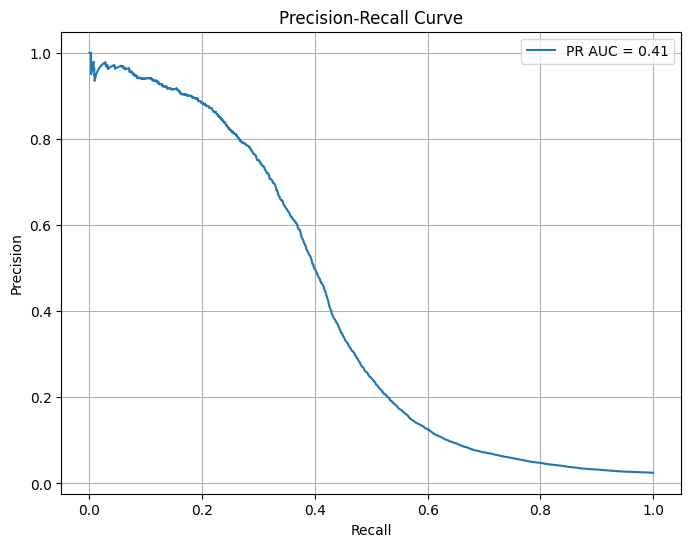

In [6]:
from uncertainbird.utils.plotting import plot_pr_curve

plot_pr_curve(predictions, targets)

<Axes: title={'center': 'Reliability Diagram ConvNeXt Masked | ECE = 2.29%'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

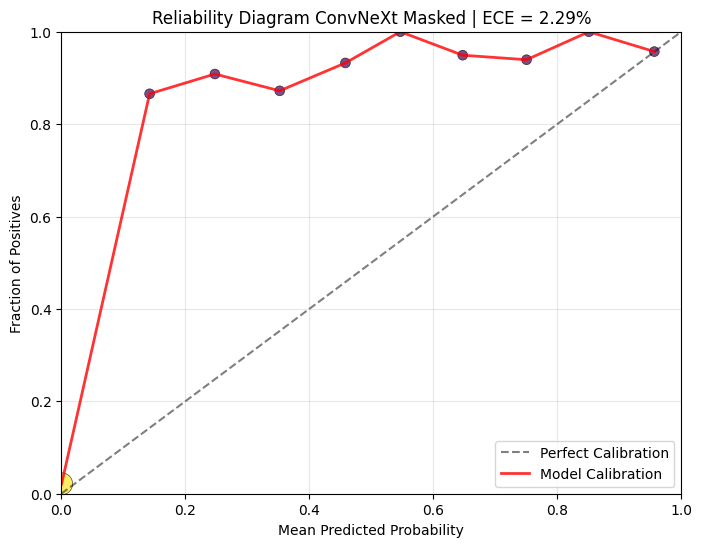

In [10]:
from uncertainbird.utils.plotting import plot_reliability_diagram

plot_reliability_diagram(
    predictions,
    targets,
    n_bins=10,
    title=f"Reliability Diagram ConvNeXt Masked | ECE = {ece*100:.2f}%",
)

Class 0: mean: 0.0192, std: 0.1005, min: 0.0000, max: 0.9956, positive samples: 2676
Class 1: mean: 0.0018, std: 0.0245, min: 0.0000, max: 0.9839, positive samples: 1082
Class 2: mean: 0.0012, std: 0.0205, min: 0.0000, max: 0.9692, positive samples: 735
Class 3: mean: 0.0003, std: 0.0048, min: 0.0000, max: 0.2869, positive samples: 671
Class 4: mean: 0.0081, std: 0.0712, min: 0.0000, max: 0.9966, positive samples: 320
ECE of top-5 predictions: tensor(0.0854)


<Axes: title={'center': 'Reliability Diagram (Top-5 Predictions) | ECE@5 = 8.54%'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

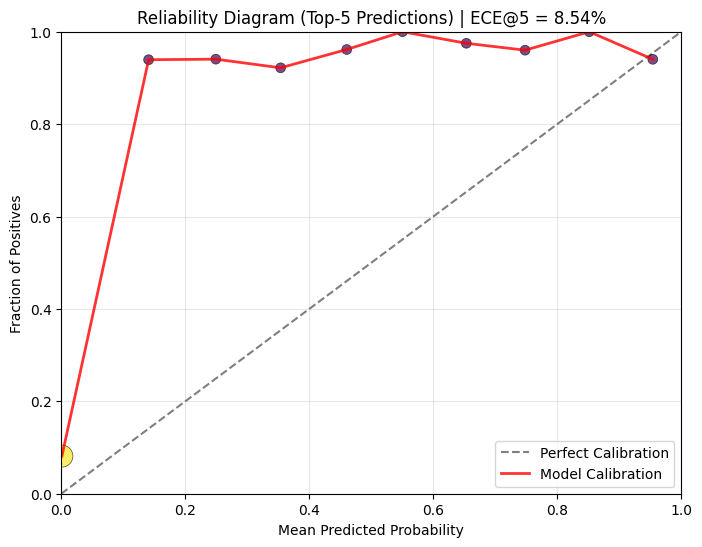

In [11]:
from uncertainbird.utils.misc import extract_top_k

top5_preds, top5_targets = extract_top_k(predictions, targets, k=5)
print_classwise_statistics(top5_preds, top5_targets)
ece_5 = TopKMultiLabelCalibrationError(k=5, n_bins=10)(top5_preds, top5_targets)
print("ECE of top-5 predictions:", ece_5)
plot_reliability_diagram(
    top5_preds,
    top5_targets,
    n_bins=10,
    title="Reliability Diagram (Top-5 Predictions) | ECE@5 = {:.2f}%".format(
        float(ece_5) * 100
    ),
)

<Axes: title={'center': 'Confidence Histogram'}, xlabel='Predicted Probability (Confidence)', ylabel='Number of Predictions (Log Scale)'>

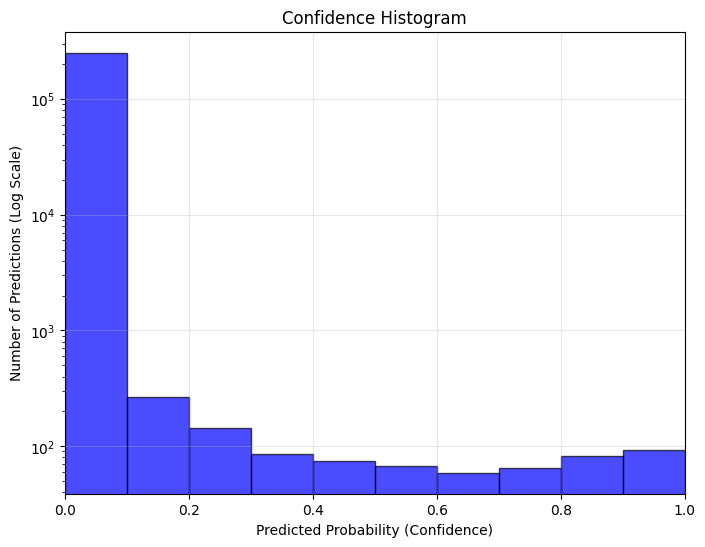

In [12]:
from uncertainbird.utils.plotting import plot_confidence_histogram

plot_confidence_histogram(predictions, n_bins=10)